# ***Circuit generation***

In [8]:
from pytket.circuit import Circuit
from pytket.circuit import Qubit
from pytket.qasm import circuit_from_qasm, circuit_to_qasm
from pytket.quipper import circuit_from_quipper
from pytket.circuit.display import render_circuit_jupyter

### Wires, units IDs and registers

In [9]:
# three qubits and two bits circuit construction
c = Circuit(3, 2)
print(c.qubits)
print(c.bits)


[q[0], q[1], q[2]]
[c[0], c[1]]


In [10]:
# Giving arbitrary names and indices to qubits and bits
new_q1 = Qubit("alpha", 0)
new_q2 = Qubit("beta", 2, 1)
new_q3 = Qubit("gamma", (0, 0, 0))
c.add_qubit(new_q1)
c.add_qubit(new_q2)
c.add_qubit(new_q3)
print(c.qubits)

[alpha[0], beta[2, 1], gamma[0, 0, 0], q[0], q[1], q[2]]


In [11]:
# add a new register of qubits
c.add_q_register("delta", 4)
print(c.qubits)

[alpha[0], beta[2, 1], delta[0], delta[1], delta[2], delta[3], gamma[0, 0, 0], q[0], q[1], q[2]]


In [12]:
# Add gates to the circuit
c.CX(0, 1)
c.H(new_q1)
c.CX(Qubit("q", 1), new_q2)
c.Rz(0.5, new_q2)
print(c.get_commands())

[H alpha[0];, CX q[0], q[1];, CX q[1], beta[2, 1];, Rz(0.5) beta[2, 1];]


### Importing and exporting from standars formats

In [13]:
c = Circuit(3, 1)
c.H(0)
c.CX(0, 1)
c.CX(1, 2)
c.Rz(0.25, 2)
c.Measure(2, 0)

[H q[0]; CX q[0], q[1]; CX q[1], q[2]; Rz(0.25) q[2]; Measure q[2] --> c[0]; ]

In [9]:
# Export to a file in QASM format

qasmfile = "c.qasm"
circuit_to_qasm(c, qasmfile)

In [10]:
with open(qasmfile) as f:
    print(f.read())

OPENQASM 2.0;
include "qelib1.inc";

qreg q[3];
creg c[1];
h q[0];
cx q[0],q[1];
cx q[1],q[2];
rz(0.25*pi) q[2];
measure q[2] -> c[0];



In [11]:
# import from a QASM format

c1 = circuit_from_qasm(qasmfile)
c == c1

True

In [12]:
# Import from Quipper ASCII format

quipfile = "c.quip"
with open(quipfile, "w") as f:
    f.write(
        """Inputs: 0:Qbit, 1:Qbit
QGate["W"](0,1)
QGate["omega"](1)
QGate["swap"](0,1)
QGate["W"]*(1,0)
Outputs: 0:Qbit, 1:Qbit
"""
    )

In [13]:
c = circuit_from_quipper(quipfile)
print(c.get_commands())

[Rz(1.25) q[0];, T q[1];, Ry(1) q[0];, Ry(1) q[1];, CX q[1], q[0];, Ry(3.75) q[1];, CX q[0], q[1];, Ry(0.25) q[1];, CX q[1], q[0];, T q[0];, Rz(1.25) q[1];, Ry(1) q[0];, Ry(1) q[1];, SWAP q[0], q[1];, T q[0];, Rz(1.25) q[1];, Ry(1) q[0];, Ry(1) q[1];, CX q[0], q[1];, Ry(3.75) q[0];, CX q[1], q[0];, Ry(0.25) q[0];, CX q[0], q[1];, Rz(1.25) q[0];, T q[1];, Ry(1) q[0];, Ry(1) q[1];]


### Boxes

In [14]:
from math import sqrt
import numpy as np
from pytket.circuit import CircBox, ExpBox, PauliExpBox, Unitary1qBox, Unitary2qBox
from pytket.pauli import Pauli

In [15]:
# Main circuit
boxycirc = Circuit(3)

In [16]:
# Add a CircBox
subcirc = Circuit(2)
subcirc.X(0).Y(1).CZ(0,1)
cbox = CircBox(subcirc)

boxycirc.add_gate(cbox, args=[Qubit(0), Qubit(1)])

[CircBox q[0], q[1]; ]

In [17]:
# Add unitary1qBox

m1 = np.asarray([[1 / 2, sqrt(3) / 2], [sqrt(3) / 2, -1 / 2]])
m1box = Unitary1qBox(m1)
boxycirc.add_unitary1qbox(m1box, 2)

[CircBox q[0], q[1]; Unitary1qBox q[2]; ]

In [18]:
# Add Unitary2qBox

m2 = np.asarray([[0, 0, 1, 0], [0, 1, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0]])
m2box = Unitary2qBox(m2)
boxycirc.add_unitary2qbox(m2box, 1, 2)

[CircBox q[0], q[1]; Unitary1qBox q[2]; Unitary2qBox q[1], q[2]; ]

In [19]:
# Add an ExpBox

A = np.asarray(
    [[1, 2, 3, 4 + 1j], [2, 0, 1j, -1], [3, -1j, 2, 1j], [4 - 1j, -1, -1j, 1]]
)
ebox = ExpBox(A, 0.5)
boxycirc.add_expbox(ebox, 0, 1)

[CircBox q[0], q[1]; Unitary1qBox q[2]; Unitary2qBox q[1], q[2]; ExpBox q[0], q[1]; ]

In [20]:
# Add a PauliExpBox

pbox = PauliExpBox([Pauli.X, Pauli.Z, Pauli.X], 0.75)
boxycirc.add_gate(pbox, [0, 1, 2])

[CircBox q[0], q[1]; Unitary1qBox q[2]; Unitary2qBox q[1], q[2]; ExpBox q[0], q[1]; PauliExpBox q[0], q[1], q[2]; ]

In [21]:
print(boxycirc.get_commands())

[CircBox q[0], q[1];, Unitary1qBox q[2];, Unitary2qBox q[1], q[2];, ExpBox q[0], q[1];, PauliExpBox q[0], q[1], q[2];]


In [22]:
print(pbox.get_circuit().get_commands())

[ConjugationBox q[0], q[1], q[2];]


In [23]:
# Quipper subroutines with CircBox operations

with open(quipfile, "w") as f:
    f.write(
        """Inputs: 0:Qbit, 1:Qbit, 2:Qbit
QGate["H"](0)
Subroutine(x2)["sub", shape "([Q,Q],())"] (2,1) -> (2,1)
QGate["H"](1)
Outputs: 0:Qbit, 1:Qbit, 2:Qbit \n
Subroutine: "sub"
Shape: "([Q,Q],())"
Controllable: no
Inputs: 0:Qbit, 1:Qbit
QGate["Y"](0)
QGate["not"](1) with controls=[+0]
QGate["Z"](1)
Outputs: 0:Qbit, 1:Qbit
"""
    )


In [24]:
c = circuit_from_quipper(quipfile)
cmds = c.get_commands()
print(cmds)

[H q[0];, CircBox q[2], q[1];, CircBox q[2], q[1];, H q[1];]


In [25]:
boxed_circuit = cmds[1].op.get_circuit()
print(boxed_circuit.get_commands())

[Y q[0];, CX q[0], q[1];, Z q[1];]


### Circuit composition

In [30]:
# Serial composition
# Circuit 1

c = Circuit(2)
c.CX(0, 1)
print(c.get_commands())

# Circuit 2

c1 = Circuit(2)
c1.CZ(1, 0)
print(c1.get_commands())

# Circuit composing

c.append(c1)
print(c.get_commands())


[CX q[0], q[1];]
[CZ q[1], q[0];]
[CX q[0], q[1];, CZ q[1], q[0];]


In [40]:
# Named unit IDs
# qubit initialization
x, y = Qubit("x"), Qubit("y")

# Circuit 1
c = Circuit()
c.add_qubit(x)
c.add_qubit(y)
c.CX(x, y)
print(c.get_commands())

# Circuit 2
c1 = Circuit()
c1.add_qubit(x)
c1.add_qubit(y)
c1.CZ(y, x)
print(c1.get_commands())

c.append(c1)
print(c.get_commands())


[CX x, y;]
[CZ y, x;]
[CX x, y;, CZ y, x;]


In [41]:
# Not matching qubits between circuits

# Append an extra qubit to c1
z = Qubit("z")
c1.add_qubit(z)
c1.CY(y, z)
print(c1.get_commands())


# Compose circuit c with circuit c1
c.append(c1)
print(c.qubits)
print(c.get_commands())


[CZ y, x;, CY y, z;]
[x, y, z]
[CX x, y;, CZ y, x;, CZ y, x;, CY y, z;]


In [43]:
# Serially composing qubits with disjoint sets of Qubits

c2 = Circuit()
c2.add_q_register("w", 3)
w = [Qubit("w", i) for i in range(3)]
c2.H(w[0]).CX(w[0], w[1]).CRz(0.25, w[1], w[2])



[H w[0]; CX w[0], w[1]; CRz(0.25) w[1], w[2]; ]

In [44]:
c.rename_units({x: w[0], y: w[1], z:w[2]})

True

In [45]:
c.append(c2)
print(c.get_commands())

[CX w[0], w[1];, CZ w[1], w[0];, CZ w[1], w[0];, H w[0];, CY w[1], w[2];, CX w[0], w[1];, CRz(0.25) w[1], w[2];]


### Simbolic Parameter

In [50]:
from sympy import Symbol
from pytket.transform import Transform

In [49]:
# Create a quantum circuit
c = Circuit(1)
c.Rz(0.5, 0)

# Create a simbolic parameter for a gate
a = Symbol("a")
c.Rz(a, 0)

[Rz(0.5) q[0]; Rz(a) q[0]; ]

In [52]:
# Apply a transformation to the circuit

Transform.RemoveRedundancies().apply(c)
print(c.get_commands())

[Rz(0.5 + a) q[0];]


In [53]:
# Substitute values for symbols

c.symbol_substitution({a: 0.75})
print(c.get_commands())

[Rz(1.25) q[0];]


In [54]:
# Substitute symbols for another symbols

b = Symbol("b")
c = Circuit(1)
c.Rz(a + b, 0)
c.symbol_substitution({b: 2 * a})
print(c.get_commands())

[Rz(3*a) q[0];]


### Custom gates

In [55]:
from pytket.circuit import CustomGateDef

In [56]:
# Define a custom gate

a = Symbol("a")
b = Symbol("b")
setup = Circuit(3)
setup.CX(0, 1)
setup.Rz(a + 0.5, 2)
setup.CRz(b, 0, 2)
my_gate = CustomGateDef.define("g", setup, [a, b])

# Apply a custom gate
c = Circuit(4)
c.add_custom_gate(my_gate, [0.2, 1.3], [0, 3, 1])
print(c.get_commands())


[g(0.2,1.3) q[0], q[3], q[1];]


In [57]:
# Custom gate receive a symbolic parameter

x = Symbol("x")
c.add_custom_gate(my_gate, [x, 1.0], [0, 1, 2])
print(c.get_commands())

[g(0.2,1.3) q[0], q[3], q[1];, g(x,1.0) q[0], q[1], q[2];]


### Decomposing boxes and custom gates

In [58]:
# Decompose a custom gate into elementary gates

Transform.DecomposeBoxes().apply(c)
print(c.get_commands())

[CX q[0], q[3];, Rz(0.7) q[1];, Rz(0.5 + x) q[2];, CRz(1.3) q[0], q[1];, CX q[0], q[1];, CRz(1) q[0], q[2];]


In [59]:
# Decompose arbitrary boxes into elementary gates

c = boxycirc.copy()
Transform.DecomposeBoxes().apply(c)
print(c.get_commands())

[X q[0];, Y q[1];, TK1(0.5, 0.666667, 0.5) q[2];, CZ q[0], q[1];, TK1(1, 0.5, 1) q[2];, TK1(2.85376, 0.108518, 0.745298) q[0];, TK1(0.5, 0.5, 0) q[1];, Sdg q[2];, Vdg q[0];, Sdg q[1];, Vdg q[2];, Vdg q[1];, TK2(0.5, 0.5, 0) q[1], q[2];, Z q[1];, Z q[2];, V q[1];, V q[2];, S q[1];, S q[2];, TK1(0, 1, 0) q[1];, TK1(0.5, 0.5, 3.5) q[2];, TK1(0.949197, 0.387157, 3.3496) q[1];, H q[2];, Vdg q[1];, TK2(0.361961, 0.244835, 3.95683) q[0], q[1];, Z q[0];, Z q[1];, Z q[0];, Z q[1];, V q[0];, V q[1];, TK1(1.21947, 0.354596, 0.18545) q[0];, TK1(0.984475, 0.34973, 3.36619) q[1];, H q[0];, CX q[2], q[1];, CX q[1], q[0];, Rz(0.75) q[0];, CX q[1], q[0];, H q[0];, CX q[2], q[1];, H q[2];]


### Classical controls

In [63]:
from pytket.circuit import Bit
from pytket.circuit import OpType


In [61]:
# Create a classical register
c.add_c_register("m", 2)
m = [Bit("m", i) for i in range(2)]

In [62]:
q = [Qubit("q", i) for i in range(3)]
c.X(q[0])
c.Measure(q[0], m[0])
c.Measure(q[1], m[1])

[X q[0]; Y q[1]; TK1(0.5, 0.666667, 0.5) q[2]; CZ q[0], q[1]; TK1(1, 0.5, 1) q[2]; TK1(2.85376, 0.108518, 0.745298) q[0]; TK1(0.5, 0.5, 0) q[1]; Sdg q[2]; Vdg q[0]; Sdg q[1]; Vdg q[2]; Vdg q[1]; TK2(0.5, 0.5, 0) q[1], q[2]; Z q[1]; Z q[2]; V q[1]; V q[2]; S q[1]; S q[2]; TK1(0, 1, 0) q[1]; TK1(0.5, 0.5, 3.5) q[2]; TK1(0.949197, 0.387157, 3.3496) q[1]; H q[2]; Vdg q[1]; TK2(0.361961, 0.244835, 3.95683) q[0], q[1]; Z q[0]; Z q[1]; Z q[0]; Z q[1]; V q[0]; V q[1]; TK1(1.21947, 0.354596, 0.18545) q[0]; TK1(0.984475, 0.34973, 3.36619) q[1]; H q[0]; CX q[2], q[1]; CX q[1], q[0]; Rz(0.75) q[0]; CX q[1], q[0]; H q[0]; CX q[2], q[1]; Measure q[1] --> m[1]; X q[0]; H q[2]; Measure q[0] --> m[0]; ]

In [64]:
# Add a classical conditiones Rz operation

c.add_gate(OpType.Rz, [0.5], [q[2]], condition_bits=[m[0], m[1]], condition_value=3)


[X q[0]; Y q[1]; TK1(0.5, 0.666667, 0.5) q[2]; CZ q[0], q[1]; TK1(1, 0.5, 1) q[2]; TK1(2.85376, 0.108518, 0.745298) q[0]; TK1(0.5, 0.5, 0) q[1]; Sdg q[2]; Vdg q[0]; Sdg q[1]; Vdg q[2]; Vdg q[1]; TK2(0.5, 0.5, 0) q[1], q[2]; Z q[1]; Z q[2]; V q[1]; V q[2]; S q[1]; S q[2]; TK1(0, 1, 0) q[1]; TK1(0.5, 0.5, 3.5) q[2]; TK1(0.949197, 0.387157, 3.3496) q[1]; H q[2]; Vdg q[1]; TK2(0.361961, 0.244835, 3.95683) q[0], q[1]; Z q[0]; Z q[1]; Z q[0]; Z q[1]; V q[0]; V q[1]; TK1(1.21947, 0.354596, 0.18545) q[0]; TK1(0.984475, 0.34973, 3.36619) q[1]; H q[0]; CX q[2], q[1]; CX q[1], q[0]; Rz(0.75) q[0]; CX q[1], q[0]; H q[0]; CX q[2], q[1]; Measure q[1] --> m[1]; X q[0]; H q[2]; Measure q[0] --> m[0]; IF ([m[0], m[1]] == 3) THEN Rz(0.5) q[2]; ]

# ***Circuit Analysis***

In [73]:
from pytket.circuit import Circuit, OpType
from pytket.circuit.display import render_circuit_jupyter
from pytket.utils import Graph
from pytket.extensions.qiskit import tk_to_qiskit
from pytket.extensions.cirq import tk_to_cirq

In [74]:
c = Circuit(4, name="example")
c.add_gate(OpType.CU1, 0.5, [0, 1])
c.H(0).X(1).Y(2).Z(3)
c.X(0).CX(1, 2).Y(1).Z(2).H(3)
c.Y(0).Z(1)
c.add_gate(OpType.CU1, 0.5, [2, 3])
c.H(2).X(3)
c.Z(0).H(1).X(2).Y(3).CX(3, 0)

[CU1(0.5) q[0], q[1]; Y q[2]; Z q[3]; H q[0]; X q[1]; H q[3]; X q[0]; CX q[1], q[2]; Y q[0]; Y q[1]; Z q[2]; Z q[0]; Z q[1]; CU1(0.5) q[2], q[3]; H q[1]; H q[2]; X q[3]; X q[2]; Y q[3]; CX q[3], q[0]; ]

### Circuit statistics

In [75]:
# Show number of qubits
c.n_qubits

4

In [76]:
# Display the name of the circuit
c.name

'example'

In [77]:
# Show the depth of the circuit
c.depth()

8

In [78]:
# show the depth by type of gate
c.depth_by_type(OpType.CU1),  c.depth_by_type(OpType.H)

(2, 2)

### Circuit Visualization

In [79]:
# recommended jupyter notebook visualization
render_circuit_jupyter(c)

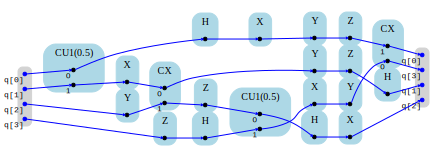

In [80]:
# Graph visualization
G = Graph(c)
G.get_DAG()

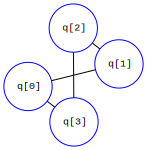

In [81]:
# Qubit connectivity graph
G.get_qubit_graph()

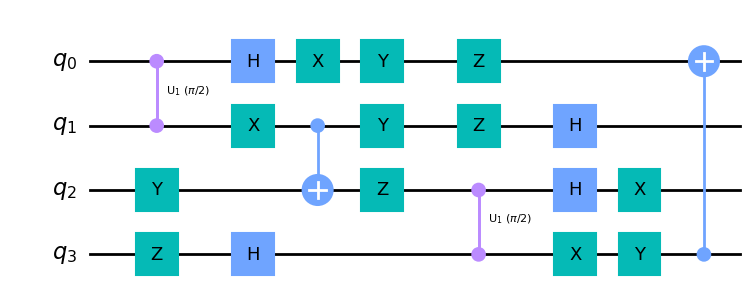

In [82]:
# Visualization via qiksit
tk_to_qiskit(c).draw('mpl', style='clifford')

In [83]:
# Visualization via cirq
print(tk_to_cirq(c))

0: ───@───────H───X───Y───Z───────────────X───
      │                                   │
1: ───@^0.5───X───@───Y───Z───────H───────┼───
                  │                       │
2: ───Y───────────X───Z───@───────H───X───┼───
                          │               │
3: ───Z───────H───────────@^0.5───X───Y───@───


In [84]:
# Visualization via latex
c.to_latex_file("c.tex")

### Commands

In [85]:
# Retrieve a list of operations comprising a circuit, represented as a Command object
cmds = c.get_commands()
print(cmds)

[CU1(0.5) q[0], q[1];, Y q[2];, Z q[3];, H q[0];, X q[1];, H q[3];, X q[0];, CX q[1], q[2];, Y q[0];, Y q[1];, Z q[2];, Z q[0];, Z q[1];, CU1(0.5) q[2], q[3];, H q[1];, H q[2];, X q[3];, X q[2];, Y q[3];, CX q[3], q[0];]


In [86]:
# Commands are defined by an operations and the qubits it acts on
cmd0 = cmds[0]

# Get the operator
op0 = cmd0.op
print(op0)

# Get the qubits acting on 
qubits0 = cmd0.args
print(qubits0)

CU1(0.5)
[q[0], q[1]]


In [87]:
# Get the operator's name
op0.get_name()  # normal form

# Get the operator's type and its params
op0.type, op0.params

(<OpType.CU1: 58>, [0.5])

# ***Conditional Gates***

In [88]:
from pytket import Circuit
from pytket.circuit.display import render_circuit_jupyter

In [89]:
circ = Circuit()
alice = circ.add_q_register("a", 2)
bob = circ.add_q_register("b", 1)
cr = circ.add_c_register("c", 2)
# Bell state between Alice and Bob:
circ.H(alice[1])
circ.CX(alice[1], bob[0])
# Bell measurement of Alice's qubits:
circ.CX(alice[0], alice[1])
circ.H(alice[0])
circ.Measure(alice[0], cr[0])
circ.Measure(alice[1], cr[1])
# Correction of Bob's qubit:
circ.Z(bob[0], condition_bits=[cr[0]], condition_value=1)
circ.X(bob[0], condition_bits=[cr[1]], condition_value=1)
render_circuit_jupyter(circ)